## 1. Configuração Inicial

Primeiro, vamos instalar e importar as bibliotecas necessárias.

In [ ]:
# Instalação das bibliotecas (execute apenas uma vez)
!pip install openai numpy scipy matplotlib scikit-learn -q

In [1]:
import os
import numpy as np
from dotenv import load_dotenv
from openai import OpenAI
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings("ignore")

# Carrega variáveis do arquivo .env
load_dotenv()

print("✅ Bibliotecas importadas com sucesso!")

Matplotlib is building the font cache; this may take a moment.


✅ Bibliotecas importadas com sucesso!


In [2]:
# A chave da API é carregada automaticamente do arquivo .env
client = OpenAI()

print("✅ Cliente OpenAI configurado!")

✅ Cliente OpenAI configurado!


## 2. Função para Obter Embeddings

Vamos criar uma função auxiliar para obter embeddings da API da OpenAI.

In [16]:
def get_embedding(text: str, model: str = "text-embedding-3-large") -> list:
    """
    Obtém o embedding de um texto usando a API da OpenAI.

    Args:
        text: O texto para gerar o embedding
        model: O modelo de embedding a ser usado

    Returns:
        Uma lista de floats representando o embedding
    """
    response = client.embeddings.create(input=text, model=model)
    return response.data[0].embedding


def cosine_similarity(vec1: list, vec2: list) -> float:
    """
    Calcula a similaridade de cosseno entre dois vetores.
    Retorna um valor entre 0 e 1, onde 1 = idênticos.
    """
    return 1 - cosine(vec1, vec2)


print("✅ Funções definidas!")

✅ Funções definidas!


## 3. Grupos de Palavras Relacionadas

Vamos definir três grupos de palavras semanticamente relacionadas:
- 🍎 **Frutas**: palavras relacionadas a frutas
- 🚗 **Veículos**: palavras relacionadas a transporte
- 🐶 **Animais**: palavras relacionadas a animais

In [52]:
# Definindo grupos de palavras relacionadas
grupos = {
    "🍎 Frutas": ["maçã", "banana", "laranja", "morango", "uva"],
    "🚗 Veículos": ["carro", "moto", "bicicleta", "ônibus", "caminhão"],
    "🐶 Animais": [
        "cão",
        "gato",
        "vaca",
        "cavalo",
        "ovelha",
        "dog",
        "cat",
        "perro",
        "chien",
    ],
}

# Vamos visualizar os grupos
for grupo, palavras in grupos.items():
    print(f"{grupo}: {', '.join(palavras)}")

🍎 Frutas: maçã, banana, laranja, morango, uva
🚗 Veículos: carro, moto, bicicleta, ônibus, caminhão
🐶 Animais: cão, gato, vaca, cavalo, ovelha, dog, cat, perro, chien


## 4. Gerando Embeddings para Cada Palavra

Agora vamos gerar os embeddings para todas as palavras.

In [53]:
# Gerando embeddings para todas as palavras
embeddings = {}
todas_palavras = []
todos_embeddings = []
cores = []

cor_por_grupo = {"🍎 Frutas": "red", "🚗 Veículos": "blue", "🐶 Animais": "green"}

print("Gerando embeddings...\n")

for grupo, palavras in grupos.items():
    print(f"Processando {grupo}...")
    for palavra in palavras:
        embedding = get_embedding(palavra)
        embeddings[palavra] = {"embedding": embedding, "grupo": grupo}
        todas_palavras.append(palavra)
        todos_embeddings.append(embedding)
        cores.append(cor_por_grupo[grupo])
        print(f"  ✓ {palavra} (vetor com {len(embedding)} dimensões)")

print(f"\n✅ Total: {len(embeddings)} embeddings gerados!")
print(f"📐 Cada embedding tem {len(embedding)} dimensões")

Gerando embeddings...

Processando 🍎 Frutas...
  ✓ maçã (vetor com 3072 dimensões)
  ✓ banana (vetor com 3072 dimensões)
  ✓ laranja (vetor com 3072 dimensões)
  ✓ morango (vetor com 3072 dimensões)
  ✓ uva (vetor com 3072 dimensões)
Processando 🚗 Veículos...
  ✓ carro (vetor com 3072 dimensões)
  ✓ moto (vetor com 3072 dimensões)
  ✓ bicicleta (vetor com 3072 dimensões)
  ✓ ônibus (vetor com 3072 dimensões)
  ✓ caminhão (vetor com 3072 dimensões)
Processando 🐶 Animais...
  ✓ cão (vetor com 3072 dimensões)
  ✓ gato (vetor com 3072 dimensões)
  ✓ vaca (vetor com 3072 dimensões)
  ✓ cavalo (vetor com 3072 dimensões)
  ✓ ovelha (vetor com 3072 dimensões)
  ✓ dog (vetor com 3072 dimensões)
  ✓ cat (vetor com 3072 dimensões)
  ✓ perro (vetor com 3072 dimensões)
  ✓ chien (vetor com 3072 dimensões)

✅ Total: 19 embeddings gerados!
📐 Cada embedding tem 3072 dimensões


## 5. Calculando Similaridade Entre Palavras

Vamos calcular a similaridade de cosseno entre algumas palavras para demonstrar que:
- Palavras do **mesmo grupo** têm alta similaridade
- Palavras de **grupos diferentes** têm baixa similaridade

In [54]:
# Comparando palavras do MESMO grupo
print("═" * 50)
print("🔵 SIMILARIDADE ENTRE PALAVRAS DO MESMO GRUPO")
print("═" * 50)

comparacoes_mesmo_grupo = [
    ("uva", "morango"),
    ("carro", "moto"),
    ("cão", "gato"),
]

for palavra1, palavra2 in comparacoes_mesmo_grupo:
    sim = cosine_similarity(
        embeddings[palavra1]["embedding"], embeddings[palavra2]["embedding"]
    )
    print(f"{palavra1} ↔ {palavra2}: {sim:.4f} ({sim*100:.1f}%)")

══════════════════════════════════════════════════
🔵 SIMILARIDADE ENTRE PALAVRAS DO MESMO GRUPO
══════════════════════════════════════════════════
uva ↔ morango: 0.4074 (40.7%)
carro ↔ moto: 0.5042 (50.4%)
cão ↔ gato: 0.5987 (59.9%)


In [55]:
# Comparando palavras de GRUPOS DIFERENTES
print("═" * 50)
print("🔴 SIMILARIDADE ENTRE PALAVRAS DE GRUPOS DIFERENTES")
print("═" * 50)

comparacoes_grupos_diferentes = [
    ("uva", "caminhão"),
    ("banana", "cão"),
    ("ônibus", "vaca"),
]

for palavra1, palavra2 in comparacoes_grupos_diferentes:
    sim = cosine_similarity(
        embeddings[palavra1]["embedding"], embeddings[palavra2]["embedding"]
    )
    print(f"{palavra1} ↔ {palavra2}: {sim:.4f} ({sim*100:.1f}%)")

══════════════════════════════════════════════════
🔴 SIMILARIDADE ENTRE PALAVRAS DE GRUPOS DIFERENTES
══════════════════════════════════════════════════
uva ↔ caminhão: 0.3022 (30.2%)
banana ↔ cão: 0.2262 (22.6%)
ônibus ↔ vaca: 0.3172 (31.7%)


## 6. Matriz de Similaridade

Vamos criar uma matriz visual mostrando a similaridade entre todas as palavras.

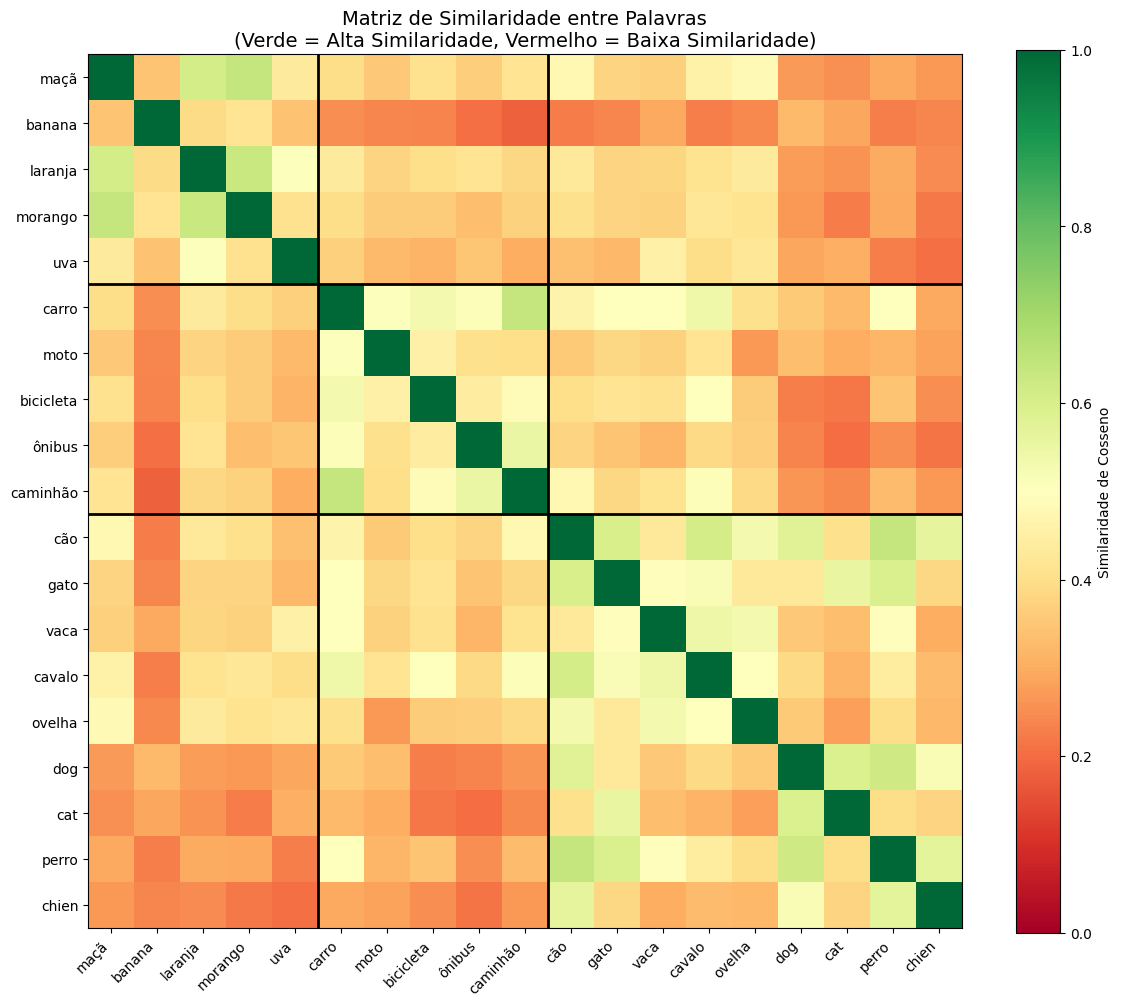


📊 Observe como os blocos na diagonal (mesmo grupo) são mais verdes!


In [56]:
# Criando matriz de similaridade
n = len(todas_palavras)
matriz_similaridade = np.zeros((n, n))

for i, palavra1 in enumerate(todas_palavras):
    for j, palavra2 in enumerate(todas_palavras):
        matriz_similaridade[i, j] = cosine_similarity(
            embeddings[palavra1]["embedding"], embeddings[palavra2]["embedding"]
        )

# Visualizando a matriz
plt.figure(figsize=(12, 10))
plt.imshow(matriz_similaridade, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar(label="Similaridade de Cosseno")
plt.xticks(range(n), todas_palavras, rotation=45, ha="right")
plt.yticks(range(n), todas_palavras)
plt.title(
    "Matriz de Similaridade entre Palavras\n(Verde = Alta Similaridade, Vermelho = Baixa Similaridade)",
    fontsize=14,
)

# Adicionando linhas para separar os grupos
plt.axhline(y=4.5, color="black", linewidth=2)
plt.axhline(y=9.5, color="black", linewidth=2)
plt.axvline(x=4.5, color="black", linewidth=2)
plt.axvline(x=9.5, color="black", linewidth=2)

plt.tight_layout()
plt.show()

print("\n📊 Observe como os blocos na diagonal (mesmo grupo) são mais verdes!")

## 7. Visualização 2D com t-SNE

Os embeddings têm muitas dimensões (1536). Vamos usar **t-SNE** para reduzir para 2 dimensões e visualizar.

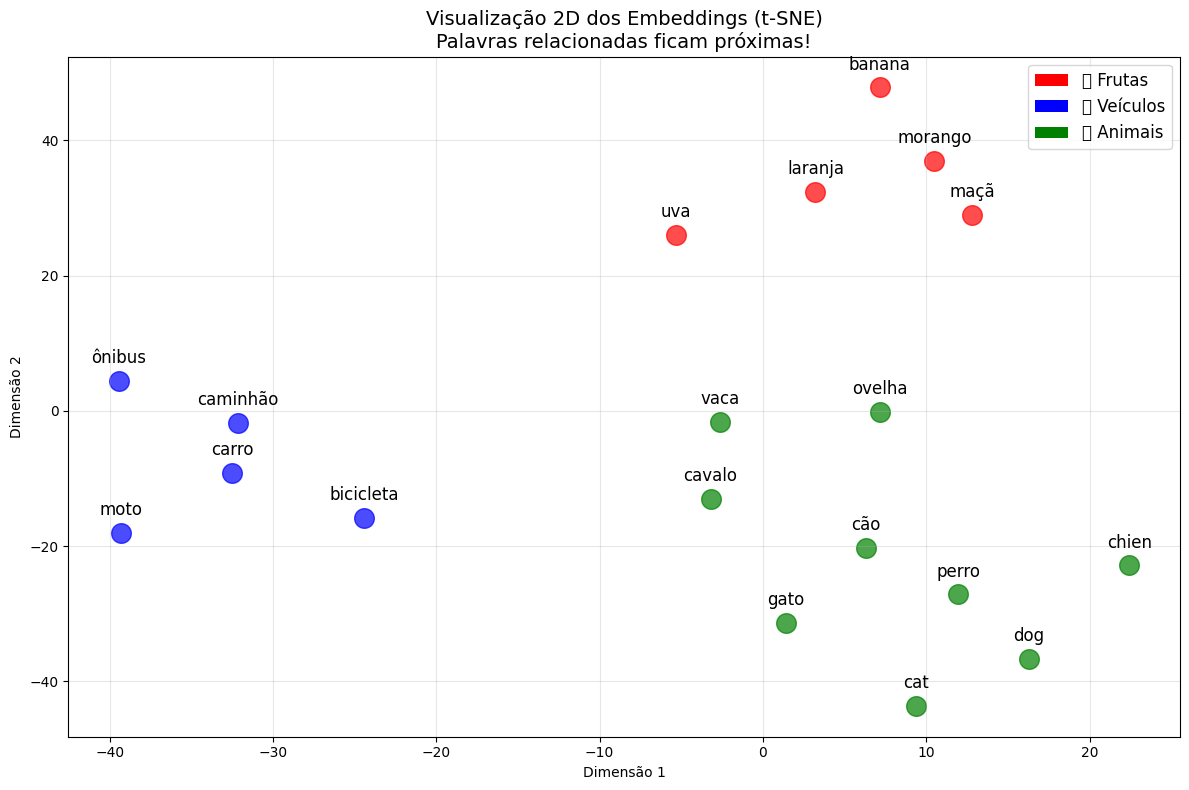


🎯 Note como palavras do mesmo grupo se agrupam!


In [57]:
# Reduzindo dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(todos_embeddings))

# Plotando
plt.figure(figsize=(12, 8))

for i, palavra in enumerate(todas_palavras):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=cores[i], s=200, alpha=0.7)
    plt.annotate(
        palavra,
        (embeddings_2d[i, 0], embeddings_2d[i, 1]),
        fontsize=12,
        ha="center",
        va="bottom",
        xytext=(0, 10),
        textcoords="offset points",
    )

# Legenda
from matplotlib.patches import Patch

legenda = [
    Patch(facecolor="red", label="🍎 Frutas"),
    Patch(facecolor="blue", label="🚗 Veículos"),
    Patch(facecolor="green", label="🐶 Animais"),
]
plt.legend(handles=legenda, loc="upper right", fontsize=12)

plt.title(
    "Visualização 2D dos Embeddings (t-SNE)\nPalavras relacionadas ficam próximas!",
    fontsize=14,
)
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎯 Note como palavras do mesmo grupo se agrupam!")

## 8. Experimento Interativo

Vamos criar uma função para você testar suas próprias palavras!

In [58]:
def comparar_palavras(palavra1: str, palavra2: str):
    """
    Compara duas palavras e mostra sua similaridade.
    """
    emb1 = get_embedding(palavra1)
    emb2 = get_embedding(palavra2)
    sim = cosine_similarity(emb1, emb2)

    print(f"\n{'═' * 40}")
    print(f"Comparando: '{palavra1}' vs '{palavra2}'")
    print(f"{'═' * 40}")
    print(f"Similaridade: {sim:.4f} ({sim*100:.1f}%)")

    # Interpretação
    if sim > 0.8:
        print("📊 Interpretação: Muito similares! Provavelmente relacionadas.")
    elif sim > 0.5:
        print("📊 Interpretação: Moderadamente similares.")
    else:
        print("📊 Interpretação: Pouco similares. Conceitos diferentes.")

    return sim


print("✅ Função pronta! Use comparar_palavras('palavra1', 'palavra2')")

✅ Função pronta! Use comparar_palavras('palavra1', 'palavra2')


In [59]:
# Teste você mesmo! Experimente diferentes pares de palavras:

comparar_palavras("rei", "rainha")
comparar_palavras("rei", "cadeira")
comparar_palavras("cachorro", "gato")


════════════════════════════════════════
Comparando: 'rei' vs 'rainha'
════════════════════════════════════════
Similaridade: 0.3549 (35.5%)
📊 Interpretação: Pouco similares. Conceitos diferentes.

════════════════════════════════════════
Comparando: 'rei' vs 'cadeira'
════════════════════════════════════════
Similaridade: 0.2307 (23.1%)
📊 Interpretação: Pouco similares. Conceitos diferentes.

════════════════════════════════════════
Comparando: 'cachorro' vs 'gato'
════════════════════════════════════════
Similaridade: 0.6502 (65.0%)
📊 Interpretação: Moderadamente similares.


np.float64(0.6501823837574906)

## 📝 Resumo

Neste notebook, aprendemos:

1. **O que são embeddings**: representações vetoriais de texto
2. **Como gerar embeddings**: usando a API da OpenAI
3. **Similaridade de cosseno**: mede o quão "próximos" dois vetores estão
4. **Propriedade semântica**: palavras relacionadas têm embeddings similares

### 🚀 Próximos passos

No próximo notebook, vamos:
- Trabalhar com **frases e parágrafos** (não apenas palavras)
- Criar um sistema de **busca semântica**
- Construir um **sistema RAG** completo!

## 9. Embeddings de Frases: Busca Semântica

Agora vamos trabalhar com **frases completas** em vez de palavras isoladas.

### A ideia:
1. Criar uma "base de conhecimento" com afirmações/fatos
2. Fazer perguntas em linguagem natural
3. Encontrar qual afirmação responde melhor cada pergunta

**Isso é a base do RAG (Retrieval Augmented Generation)!**

In [70]:
# Base de conhecimento: afirmações/fatos
afirmacoes = [
    # Geografia (índices 0-4)
    "A capital do Brasil é Brasília",
    "A Torre Eiffel fica em Paris",
    "O Rio Amazonas é o maior rio do mundo em volume de água",
    "Tóquio é a capital do Japão",
    "A Muralha da China tem mais de 20 mil quilômetros",
    # Natureza/Ciência (índices 5-10)
    "A casca da banana é amarela",
    "A água ferve a 100 graus Celsius",
    "O sol é uma estrela",
    "O coração humano tem quatro câmaras",
    "A luz viaja a 300 mil quilômetros por segundo",
    "O DNA contém as informações genéticas dos seres vivos",
    # Pessoas/Cultura (índices 11-15)
    "Messi nasceu na Argentina",
    "Leonardo da Vinci pintou a Mona Lisa",
    "Albert Einstein desenvolveu a teoria da relatividade",
    "Beethoven compôs a Nona Sinfonia",
    "Shakespeare escreveu Romeu e Julieta",
    # Tecnologia/Outros (índices 16-19)
    "Python é uma linguagem de programação",
    "O Monte Everest é a montanha mais alta do mundo",
    "A internet foi criada inicialmente para uso militar",
    "O primeiro computador ocupava uma sala inteira",
]

print("📚 Base de Conhecimento:")
print("=" * 60)
for i, afirmacao in enumerate(afirmacoes, 1):
    print(f"{i:2}. {afirmacao}")

📚 Base de Conhecimento:
 1. A capital do Brasil é Brasília
 2. A Torre Eiffel fica em Paris
 3. O Rio Amazonas é o maior rio do mundo em volume de água
 4. Tóquio é a capital do Japão
 5. A Muralha da China tem mais de 20 mil quilômetros
 6. A casca da banana é amarela
 7. A água ferve a 100 graus Celsius
 8. O sol é uma estrela
 9. O coração humano tem quatro câmaras
10. A luz viaja a 300 mil quilômetros por segundo
11. O DNA contém as informações genéticas dos seres vivos
12. Messi nasceu na Argentina
13. Leonardo da Vinci pintou a Mona Lisa
14. Albert Einstein desenvolveu a teoria da relatividade
15. Beethoven compôs a Nona Sinfonia
16. Shakespeare escreveu Romeu e Julieta
17. Python é uma linguagem de programação
18. O Monte Everest é a montanha mais alta do mundo
19. A internet foi criada inicialmente para uso militar
20. O primeiro computador ocupava uma sala inteira


In [71]:
# Gerando embeddings para todas as afirmações
print("Gerando embeddings das afirmações...\n")

embeddings_afirmacoes = []
for afirmacao in afirmacoes:
    emb = get_embedding(afirmacao)
    embeddings_afirmacoes.append(emb)
    print(f"✓ {afirmacao[:40]}...")

print(f"\n✅ {len(embeddings_afirmacoes)} embeddings de frases gerados!")

Gerando embeddings das afirmações...

✓ A capital do Brasil é Brasília...
✓ A Torre Eiffel fica em Paris...
✓ O Rio Amazonas é o maior rio do mundo em...
✓ Tóquio é a capital do Japão...
✓ A Muralha da China tem mais de 20 mil qu...
✓ A casca da banana é amarela...
✓ A água ferve a 100 graus Celsius...
✓ O sol é uma estrela...
✓ O coração humano tem quatro câmaras...
✓ A luz viaja a 300 mil quilômetros por se...
✓ O DNA contém as informações genéticas do...
✓ Messi nasceu na Argentina...
✓ Leonardo da Vinci pintou a Mona Lisa...
✓ Albert Einstein desenvolveu a teoria da ...
✓ Beethoven compôs a Nona Sinfonia...
✓ Shakespeare escreveu Romeu e Julieta...
✓ Python é uma linguagem de programação...
✓ O Monte Everest é a montanha mais alta d...
✓ A internet foi criada inicialmente para ...
✓ O primeiro computador ocupava uma sala i...

✅ 20 embeddings de frases gerados!


In [72]:
def buscar_afirmacao_mais_relevante(pergunta: str, top_k: int = 3):
    """
    Busca as afirmações mais relevantes para responder uma pergunta.

    Args:
        pergunta: A pergunta em linguagem natural
        top_k: Número de resultados a retornar

    Returns:
        Lista de tuplas (afirmação, similaridade)
    """
    # Gera embedding da pergunta
    emb_pergunta = get_embedding(pergunta)

    # Calcula similaridade com todas as afirmações
    similaridades = []
    for i, emb_afirmacao in enumerate(embeddings_afirmacoes):
        sim = cosine_similarity(emb_pergunta, emb_afirmacao)
        similaridades.append((afirmacoes[i], sim))

    # Ordena por similaridade (maior primeiro)
    similaridades.sort(key=lambda x: x[1], reverse=True)

    return similaridades[:top_k]


def mostrar_busca(pergunta: str):
    """
    Mostra os resultados de busca de forma visual.
    """
    print(f"\n{'═' * 60}")
    print(f"❓ PERGUNTA: {pergunta}")
    print(f"{'═' * 60}")

    resultados = buscar_afirmacao_mais_relevante(pergunta, top_k=3)

    print("\n📊 Afirmações mais relevantes:\n")
    for i, (afirmacao, sim) in enumerate(resultados, 1):
        # Barra de progresso visual
        barra = "█" * int(sim * 30) + "░" * (30 - int(sim * 30))
        emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
        print(f"{emoji} [{barra}] {sim:.1%}")
        print(f"   → {afirmacao}\n")


print("✅ Função de busca semântica pronta!")

✅ Função de busca semântica pronta!


### Visualização 2D das Afirmações

Vamos ver como as afirmações se distribuem no espaço vetorial usando t-SNE.

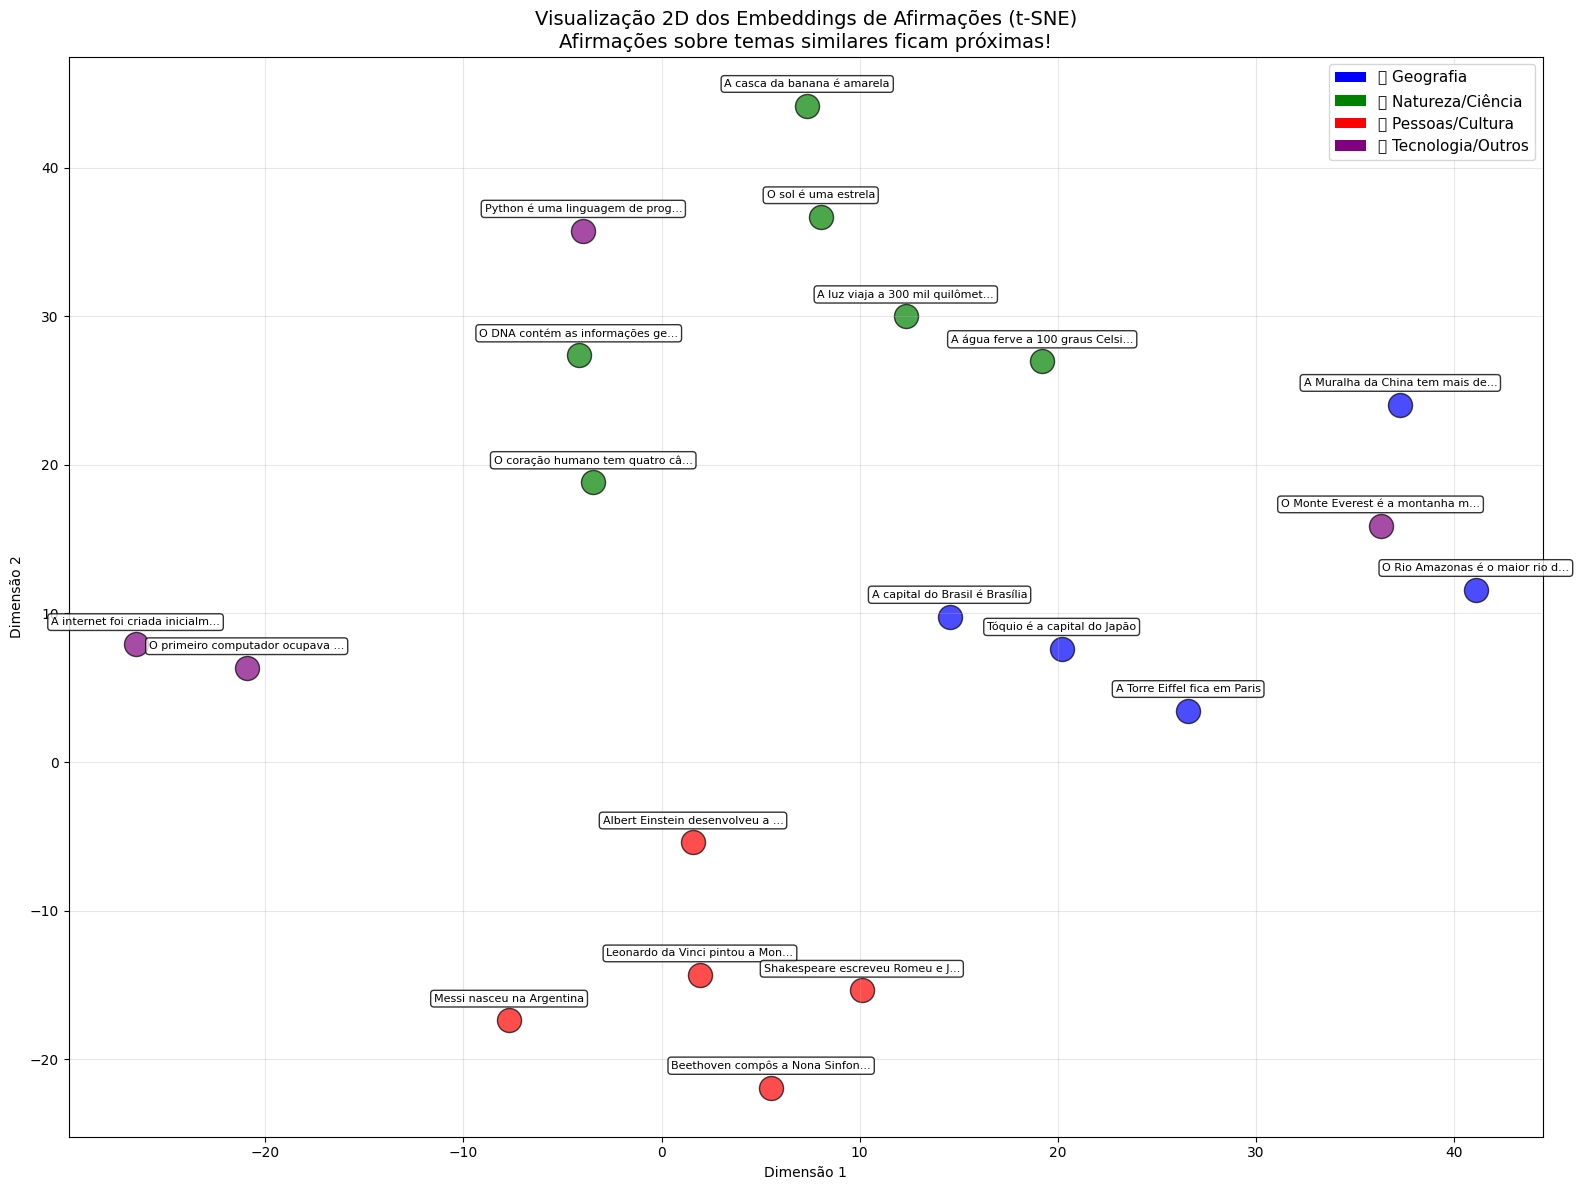


🎯 Observe como afirmações de temas similares tendem a se agrupar!


In [73]:
# Reduzindo dimensionalidade das afirmações com t-SNE
tsne_afirmacoes = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_afirmacoes_2d = tsne_afirmacoes.fit_transform(
    np.array(embeddings_afirmacoes)
)

# Categorias para colorir (baseado no tema da afirmação)
categorias = {
    "Geografia": [0, 1, 2, 3, 4],  # Brasil, Torre Eiffel, Amazonas, Tóquio, Muralha
    "Natureza/Ciência": [5, 6, 7, 8, 9, 10],  # banana, água, sol, coração, luz, DNA
    "Pessoas": [
        11,
        12,
        13,
        14,
        15,
    ],  # Messi, Da Vinci, Einstein, Beethoven, Shakespeare
    "Tecnologia/Outros": [16, 17, 18, 19],  # Python, Everest, Internet, Computador
}

cores_afirmacoes = ["gray"] * len(afirmacoes)
cores_map = {
    "Geografia": "blue",
    "Natureza/Ciência": "green",
    "Pessoas": "red",
    "Tecnologia/Outros": "purple",
}

for categoria, indices in categorias.items():
    for idx in indices:
        cores_afirmacoes[idx] = cores_map[categoria]

# Plotando
plt.figure(figsize=(16, 12))

for i, afirmacao in enumerate(afirmacoes):
    plt.scatter(
        embeddings_afirmacoes_2d[i, 0],
        embeddings_afirmacoes_2d[i, 1],
        c=cores_afirmacoes[i],
        s=300,
        alpha=0.7,
        edgecolors="black",
        linewidth=1,
    )

    # Texto resumido para caber no gráfico
    texto_curto = afirmacao[:30] + "..." if len(afirmacao) > 30 else afirmacao
    plt.annotate(
        texto_curto,
        (embeddings_afirmacoes_2d[i, 0], embeddings_afirmacoes_2d[i, 1]),
        fontsize=8,
        ha="center",
        va="bottom",
        xytext=(0, 12),
        textcoords="offset points",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    )

# Legenda
from matplotlib.patches import Patch

legenda_afirmacoes = [
    Patch(facecolor="blue", label="🌍 Geografia"),
    Patch(facecolor="green", label="🔬 Natureza/Ciência"),
    Patch(facecolor="red", label="👤 Pessoas/Cultura"),
    Patch(facecolor="purple", label="💻 Tecnologia/Outros"),
]
plt.legend(handles=legenda_afirmacoes, loc="upper right", fontsize=11)

plt.title(
    "Visualização 2D dos Embeddings de Afirmações (t-SNE)\nAfirmações sobre temas similares ficam próximas!",
    fontsize=14,
)
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎯 Observe como afirmações de temas similares tendem a se agrupar!")

### Testando a Busca Semântica

Vamos fazer perguntas e ver qual afirmação é mais relevante para cada uma!

In [74]:
# Teste 1: Pergunta sobre geografia
mostrar_busca("Qual é a capital do Brasil?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: Qual é a capital do Brasil?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [██████████████████████░░░░░░░░] 74.6%
   → A capital do Brasil é Brasília

🥈 [████████████░░░░░░░░░░░░░░░░░░] 42.6%
   → Tóquio é a capital do Japão

🥉 [███████░░░░░░░░░░░░░░░░░░░░░░░] 25.8%
   → A Torre Eiffel fica em Paris



In [75]:
# Teste 2: Pergunta sobre esporte
mostrar_busca("Onde o Messi nasceu?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: Onde o Messi nasceu?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [██████████████████████░░░░░░░░] 75.3%
   → Messi nasceu na Argentina

🥈 [██████░░░░░░░░░░░░░░░░░░░░░░░░] 21.9%
   → A capital do Brasil é Brasília

🥉 [██████░░░░░░░░░░░░░░░░░░░░░░░░] 20.9%
   → Tóquio é a capital do Japão



In [76]:
# Teste 3: Pergunta sobre ciência
mostrar_busca("A que temperatura a água entra em ebulição?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: A que temperatura a água entra em ebulição?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [████████████████████░░░░░░░░░░] 66.7%
   → A água ferve a 100 graus Celsius

🥈 [████████░░░░░░░░░░░░░░░░░░░░░░] 28.4%
   → A luz viaja a 300 mil quilômetros por segundo

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 27.2%
   → O Monte Everest é a montanha mais alta do mundo



In [77]:
# Teste 4: Pergunta sobre frutas (formulada de forma diferente)
mostrar_busca("De que cor é uma banana?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: De que cor é uma banana?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████████░░░░░░░░░] 71.9%
   → A casca da banana é amarela

🥈 [████████░░░░░░░░░░░░░░░░░░░░░░] 28.1%
   → Python é uma linguagem de programação

🥉 [███████░░░░░░░░░░░░░░░░░░░░░░░] 26.4%
   → O sol é uma estrela



In [78]:
# Teste 5: Pergunta sobre arte
mostrar_busca("Quem pintou a Mona Lisa?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: Quem pintou a Mona Lisa?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [██████████████████████░░░░░░░░] 74.0%
   → Leonardo da Vinci pintou a Mona Lisa

🥈 [████████░░░░░░░░░░░░░░░░░░░░░░] 29.1%
   → Albert Einstein desenvolveu a teoria da relatividade

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 28.8%
   → Shakespeare escreveu Romeu e Julieta



In [79]:
# Teste 6: Pergunta em linguagem bem diferente da afirmação
mostrar_busca("Qual é o pico mais elevado do planeta Terra?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: Qual é o pico mais elevado do planeta Terra?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████░░░░░░░░░░░░░] 57.2%
   → O Monte Everest é a montanha mais alta do mundo

🥈 [█████████░░░░░░░░░░░░░░░░░░░░░] 31.0%
   → A água ferve a 100 graus Celsius

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 27.4%
   → Tóquio é a capital do Japão



In [81]:
mostrar_busca("Como é dividido nosso principal músculo que bombeia sangue?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: Como é dividido nosso principal músculo que bombeia sangue?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████░░░░░░░░░░░░░] 58.5%
   → O coração humano tem quatro câmaras

🥈 [███████░░░░░░░░░░░░░░░░░░░░░░░] 25.5%
   → O primeiro computador ocupava uma sala inteira

🥉 [███████░░░░░░░░░░░░░░░░░░░░░░░] 24.0%
   → O Rio Amazonas é o maior rio do mundo em volume de água



In [82]:
mostrar_busca("Qual o tamanho das máquinas de computação primordias?")


════════════════════════════════════════════════════════════
❓ PERGUNTA: Qual o tamanho das máquinas de computação primordias?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [████████████████████░░░░░░░░░░] 67.3%
   → O primeiro computador ocupava uma sala inteira

🥈 [█████████░░░░░░░░░░░░░░░░░░░░░] 30.6%
   → A internet foi criada inicialmente para uso militar

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 26.7%
   → Albert Einstein desenvolveu a teoria da relatividade



### 🧪 Experimente você mesmo!

Faça suas próprias perguntas e veja qual afirmação o sistema encontra!

In [ ]:
# Digite sua pergunta aqui!
mostrar_busca("Onde fica a Torre Eiffel?")

### 💡 O que aprendemos?

1. **Busca semântica funciona!** - O sistema encontra a afirmação correta mesmo quando a pergunta usa palavras diferentes
2. **Não é busca por palavras-chave** - "pico mais elevado" encontrou "montanha mais alta" 
3. **Base para RAG** - Isso é exatamente o que sistemas RAG fazem: encontram informações relevantes para dar contexto ao LLM

### 🚀 Próximo passo: RAG completo

No próximo notebook, vamos combinar:
- **Busca semântica** (o que fizemos aqui)
- **LLM** (para gerar respostas)
- **Contexto** (as afirmações encontradas)

Isso é o **RAG (Retrieval Augmented Generation)**!